Peak hour: 7:00
Cumulative energy consumption (using cumsum): 64.00 kWh
Cumulative energy consumption (using simps): 63.31 kWh


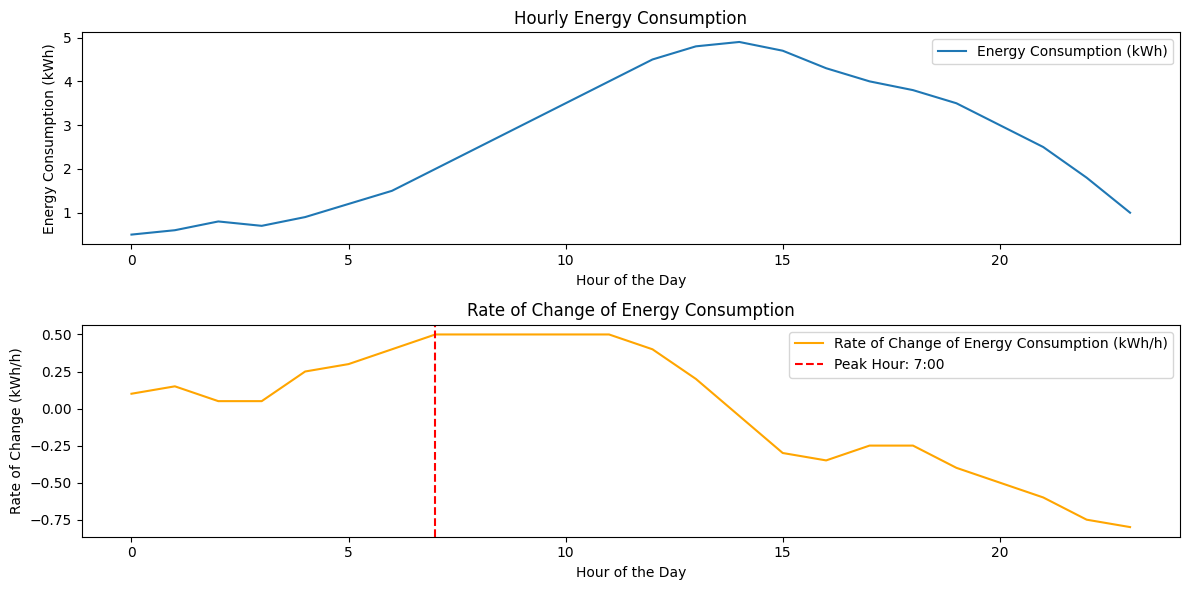

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.misc import derivative

# Sample energy consumption data for demonstration purposes
# Let's assume we have hourly energy consumption data for one day (24 hours)
hours = np.arange(24)
energy_consumption = np.array([0.5, 0.6, 0.8, 0.7, 0.9, 1.2, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0,
                               4.5, 4.8, 4.9, 4.7, 4.3, 4.0, 3.8, 3.5, 3.0, 2.5, 1.8, 1.0])  # kWh

# Derivative: Calculate the rate of change of energy consumption to identify peak hours
rate_of_change = np.gradient(energy_consumption, hours)

# Identify peak hours where the rate of change is maximum
peak_hours = hours[np.argmax(rate_of_change)]
print(f"Peak hour: {peak_hours}:00")

# Integral: Calculate the cumulative energy consumption over time
cumulative_energy = np.cumsum(energy_consumption)  # Cumulative sum of energy consumption

# Alternatively, using numerical integration (Simpson's rule)
cumulative_energy_simps = simps(energy_consumption, hours)

print(f"Cumulative energy consumption (using cumsum): {cumulative_energy[-1]:.2f} kWh")
print(f"Cumulative energy consumption (using simps): {cumulative_energy_simps:.2f} kWh")

# Plot the energy consumption and its rate of change
plt.figure(figsize=(12, 6))

# Plot energy consumption
plt.subplot(2, 1, 1)
plt.plot(hours, energy_consumption, label='Energy Consumption (kWh)')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Hourly Energy Consumption')
plt.legend()

# Plot rate of change of energy consumption
plt.subplot(2, 1, 2)
plt.plot(hours, rate_of_change, label='Rate of Change of Energy Consumption (kWh/h)', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Rate of Change (kWh/h)')
plt.title('Rate of Change of Energy Consumption')
plt.axvline(x=peak_hours, color='red', linestyle='--', label=f'Peak Hour: {peak_hours}:00')
plt.legend()

plt.tight_layout()
plt.show()
